In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')

### Тема проектной работы
### Исследование зависимости рейтинга фильма от количества изображенных лиц на рекламных постерах к фильму

###### У фильма может быть большое количество  постеров, в исследовании участвуют постеры размещенные на сайте imdb.com

In [2]:
data = pd.read_csv('movie_metadata.csv', error_bad_lines=False)
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


###### Удалим строки с пустыми ячейками c количеством лиц на постерах 

In [3]:
data = data.dropna(subset=['facenumber_in_poster'])

###### Корреляция между исследуемыми параметрами низкая и отрицательная

In [4]:
data[['imdb_score', 'facenumber_in_poster']].corr()

,imdb_score,facenumber_in_poster
imdb_score,1.000000,-0.062958
facenumber_in_poster,-0.062958,1.000000


###### Рассмотрим количество постеров с различным количеством изображенным лиц

In [5]:
data['facenumber_in_poster'].value_counts()

0.0     2152
1.0     1251
2.0      716
3.0      380
4.0      207
5.0      114
6.0       76
7.0       48
8.0       37
9.0       18
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

###### Для исследования сравнимых по объему выборок, рассматривать будем следующие постеры: без изображенных лиц, с одним лицом и   больше чем  с одним лицом

In [6]:
face0 = data.loc[data['facenumber_in_poster'] == 0, :]
face1 = data.loc[data['facenumber_in_poster'] == 1, :]
face2 = data.loc[data['facenumber_in_poster'] > 1, :]

###### Рассмотрим распределение рейтинга в выборке постеров без изображенных лиц. Мы видим распределение близкое к нормальному, но с большим количеством выбросов с низким рейтингом. Медиана рейтинга равна 6.7 

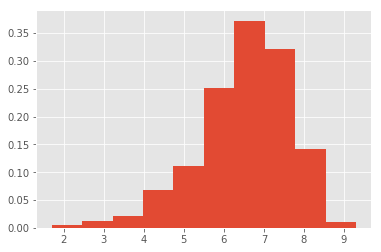

In [7]:
face0['imdb_score'].hist(bins=10, density=1)

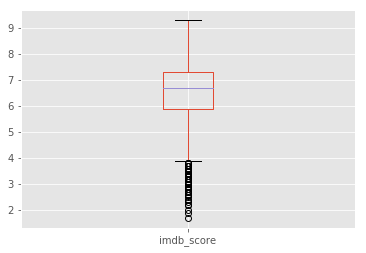

In [8]:
face0[['imdb_score']].boxplot();

In [9]:
face0['imdb_score'].median()

6.7

###### Рассмотрим распределение рейтинга в выборке постеров с одним изображенным лицом. Мы видим распределение близкое к нормальному, но с большим количеством выбросов с низким рейтингом. Медиана рейтинга равна 6.6 

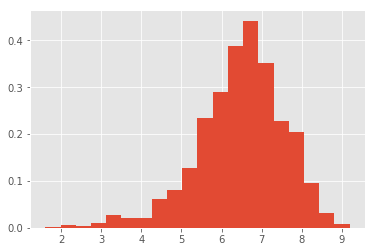

In [10]:
face1['imdb_score'].hist(bins=20, density=1)

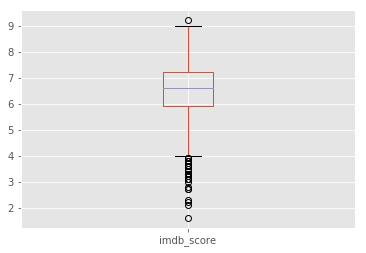

In [11]:
face1[['imdb_score']].boxplot();

In [12]:
face1['imdb_score'].median()

6.6

###### Рассмотрим распределение рейтинга в выборке постеров с больше чем одним изображенным лицом. Мы видим распределение близкое  к нормальному,  но с большим количеством выбросов с низким рейтингом. Медиана рейтинга равна 6.4 

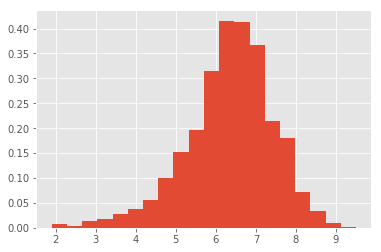

In [13]:
face2['imdb_score'].hist(bins=20, density=1)

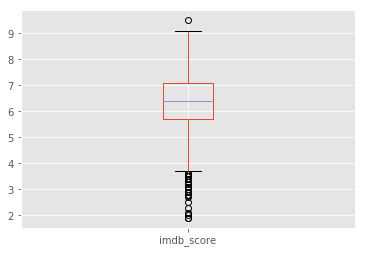

In [14]:
face2[['imdb_score']].boxplot();

In [15]:
face2['imdb_score'].median()

6.4

###### Мы видим разницу в медианных значениях в выборках. Проверим  гипотезу о равенстве среднего рейтинга в каждой выборке. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [16]:
face0_mean = face0['imdb_score'].mean()
n0 = face0['imdb_score'].count()
face0_mean 

6.509897769516728

In [17]:
face1_mean = face1['imdb_score'].mean()
n1 = face1['imdb_score'].count()
face1_mean

6.472581934452439

In [18]:
face2_mean = face2['imdb_score'].mean()
n2 = face2['imdb_score'].count()
face2_mean

6.3321450522433915

In [19]:
face_mean = data['imdb_score'].mean()
face_mean

6.443121272365805

In [20]:
S2_F = n0 * (face0_mean - face_mean) ** 2 + n1 * (face1_mean - face_mean) ** 2 + n2 * (face2_mean - face_mean) ** 2

S2_res = ((face0['imdb_score'] - face0_mean) ** 2).sum() + ((face1['imdb_score']  - face1_mean) ** 2).sum() + ((face2['imdb_score']  - face2_mean) ** 2).sum()

S2_F, S2_res

(30.719444395174364, 6328.637551628683)

In [21]:
k = 3
n = n0 + n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(15.359722197587182, 1.2589292921481365)

In [22]:
T = sigma2_F / sigma2_res
T

12.20062341339169

###### Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [23]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

2.997518225076963

###### Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средних рейтингов по данным выборкам  является статистически значимым.

###### Построим модель линейной регресии по всему исследуемому датасету, используя парную регрессию

In [24]:
X = data['facenumber_in_poster']
Y = data['imdb_score']
MX = X.mean()
MY = Y.mean()
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

-0.1425546660383691

In [25]:
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
corr = cov / (X.std() * Y.std())
corr

-0.06295752448504902

In [26]:
b1 = ((X * Y).mean() - X.mean() * Y.mean()) / ((X ** 2).mean() - X.mean() ** 2)
b1

-0.035159720917927594

In [27]:
b0 = Y.mean() - b1 * X.mean()
b0

6.491331331047902

##### Модель линейной регрессии имеет вид:

###### $$Y = 6.49 - 0.04 \cdot X,$$

##### С увеличением на одно изображенное лицо на постере рейтинг фильма  падает на 0.04 балла, то  есть влияние незначительное. Визуализируем полученные результаты на графике:

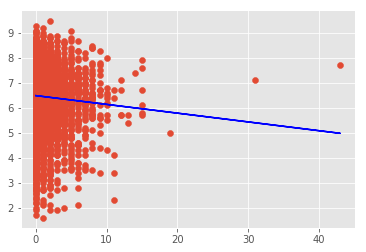

In [28]:
ox = X
oy = b0 + b1 * ox
plt.scatter(X, Y)
plt.plot(ox, oy, color='blue')

###### Посчитаем коэффициент детерминации для модели. Только  0.4%  дисперсии целевой переменной с рейтингом фильма учитывается или объясняется моделью. Оставшиеся  99.6% обусловлены какими-то ещё факторами, которые модель не учла

In [29]:
z = b0 + b1 * ox
R = z.var() / Y.var()
R

0.003963649889285606

In [30]:
data[['imdb_score', 'facenumber_in_poster']].corr() ** 2

,imdb_score,facenumber_in_poster
imdb_score,1.000000,0.003964
facenumber_in_poster,0.003964,1.000000


###### Рассмотрим верояности получения максимального и минимального рейтинга в каждой выборке 

###### Вероятность получения  высокого рейтинга (>=7.5) по каждой выборке. Мы видим, что вероятности получения высокого рейтинга понижается с увеличением количества лиц на постерах

In [31]:
high = face0.loc[data['imdb_score'] >= 7.5, :]
high['imdb_score'].count() / face0['imdb_score'].count()

0.20213754646840149

In [32]:
high = face1.loc[data['imdb_score'] >= 7.5, :]
high['imdb_score'].count() / face1['imdb_score'].count()

0.17985611510791366

In [33]:
high = face2.loc[data['imdb_score'] >= 7.5, :]
high['imdb_score'].count() / face2['imdb_score'].count()

0.13767670559311618

###### Вероятность получения  низкого рейтинга (< 5) по каждой выборке. Мы видим, что  количество лиц на постерах сущетсвенно не влияют на вероятности получения низкого рейтинга

In [34]:
low = face0.loc[data['imdb_score'] < 5, :]
low['imdb_score'].count() / face0['imdb_score'].count()

0.09804832713754646

In [35]:
low = face1.loc[data['imdb_score'] < 5, :]
low['imdb_score'].count() / face1['imdb_score'].count()

0.08393285371702638

In [36]:
low = face2.loc[data['imdb_score'] < 5, :]
low['imdb_score'].count() / face2['imdb_score'].count()

0.10018438844499078

### Выводы

### По результатам проведенного исследования выявлена небольшая зависимость между количеством изображенных лиц на постерах и рейтингом фильма. Чем больше изображенно лиц на постере, тем ниже рейтинг фильма, но эта  зависимость несущественна. В тоже время вероятность получения высокого рейтинга за фильм в зависимости от количества изображенных лиц на постерах достаточна существенна.  Наверное можно дать рекомендацию создателям фильмов стараться меньше изображать лиц  на постерах для увеличения верояности получения высокого рейтинга.
